In [20]:

import pandas as pd
import mne
import numpy as np

df = pd.read_csv('naren_fist.csv', delimiter=';', skiprows=1,)

df.head()

,CH1,CH2,CH3,CH4,Vbat,Trigger,AccX,AccY,AccZ,GyX,GyY,GyZ,N,fs,Timestamp
0,"-340,877059437378","-168,648879180355","-287,897876629472","-245,761273175974",3937,0,-2668,514,-16442,149,167,-27,66713,500,10:10:11.149406
1,"-253,977646008888","-143,233902958907","-232,769519398903","-199,233885508197",3937,0,-2668,514,-16442,149,167,-27,66714,500,10:10:11.149418
2,"-151,613224940229","-104,428919786033","-161,342166511377","-134,897467476918",3937,0,-2668,514,-16442,149,167,-27,66715,500,10:10:11.149424
3,"-51,7447938968384","-57,1558922498696","-87,3183118152679","-65,6228294832829",3937,0,-2668,514,-16442,149,167,-27,66716,500,10:10:11.149431
4,"24,9721239488552","-11,6800078362645","-25,341826854921","-6,36390890169395",3937,0,-2668,514,-16442,149,167,-27,66717,500,10:10:11.149438


In [21]:

channels = ['CH1', 'CH2', 'CH3', 'CH4']
for ch in channels:
    df[ch] = df[ch].str.replace(',', '').astype(float)

# Drop any rows with NaN values
df = df.dropna()
df = df[channels]
# df = df.drop("label", axis=1)
df.head()

,CH1,CH2,CH3,CH4
0,-3.408771e+14,-1.686489e+14,-2.878979e+14,-2.457613e+14
1,-2.539776e+14,-1.432339e+14,-2.327695e+14,-1.992339e+14
2,-1.516132e+14,-1.044289e+14,-1.613422e+14,-1.348975e+14
3,-5.174479e+14,-5.715589e+14,-8.731831e+14,-6.562283e+14
4,2.497212e+14,-1.168001e+14,-2.534183e+13,-6.363909e+14


In [22]:
# scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)


Creating RawArray with float64 data, n_channels=4, n_times=132672
    Range : 0 ... 132671 =      0.000 ...   265.342 secs
Ready.


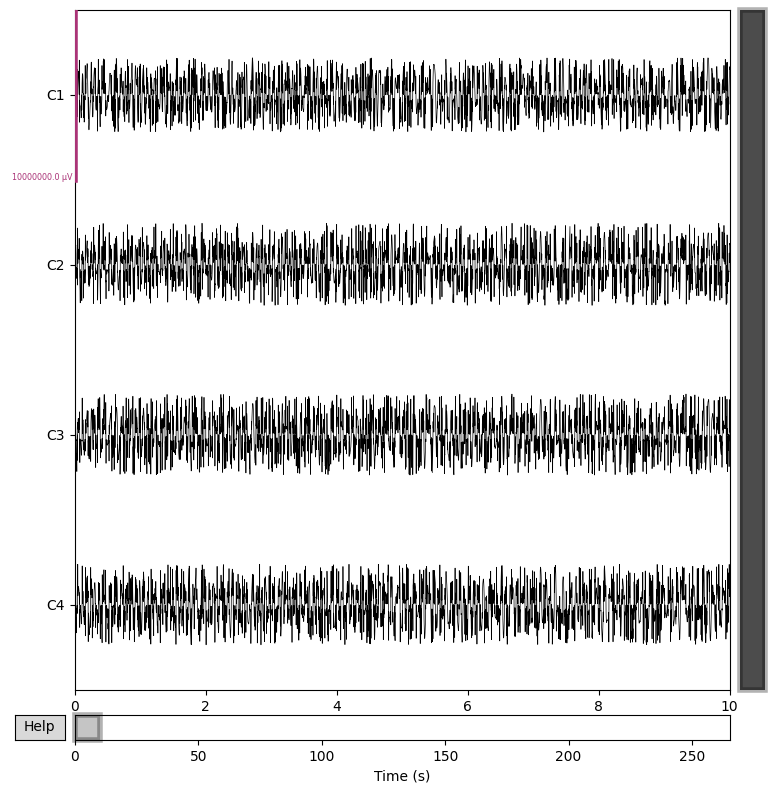

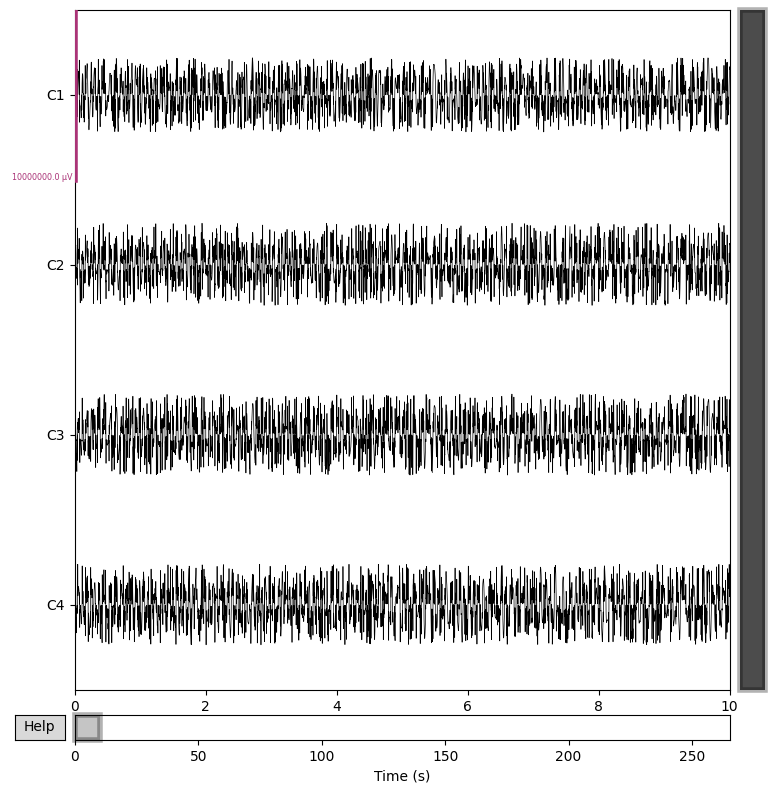

In [23]:
#define info EEG RAW
sfreq = 500
ch_types = ["eeg", "eeg", "eeg", "eeg"]
ch_names = ["C1","C2","C3","C4"]
montage = mne.channels.make_standard_montage("standard_1020")
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage(montage)

# Create RawArray
data = df.T
raw = mne.io.RawArray(data, info)
raw.plot(n_channels=4, scalings=5, show=True, block=True)



In [24]:
raw.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [25]:
# create onset in patttern 5,15,25 ...
total_duration = raw.times[-1]
onset = np.arange(5, total_duration, 5)
duration = [5] * len(onset)
description = ['Fist'] * len(onset)

annotations = mne.Annotations(onset=onset, duration=duration, description=description)
raw.set_annotations(annotations)

C:\Users\FARHAN FRANAKA\AppData\Local\Temp\ipykernel_13572\3240947853.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [26]:
events, _ = mne.events_from_annotations(raw)
print(events)

Used Annotations descriptions: ['Fist']
[[  2500      0      1]
 [  5000      0      1]
 [  7500      0      1]
 [ 10000      0      1]
 [ 12500      0      1]
 [ 15000      0      1]
 [ 17500      0      1]
 [ 20000      0      1]
 [ 22500      0      1]
 [ 25000      0      1]
 [ 27500      0      1]
 [ 30000      0      1]
 [ 32500      0      1]
 [ 35000      0      1]
 [ 37500      0      1]
 [ 40000      0      1]
 [ 42500      0      1]
 [ 45000      0      1]
 [ 47500      0      1]
 [ 50000      0      1]
 [ 52500      0      1]
 [ 55000      0      1]
 [ 57500      0      1]
 [ 60000      0      1]
 [ 62500      0      1]
 [ 65000      0      1]
 [ 67500      0      1]
 [ 70000      0      1]
 [ 72500      0      1]
 [ 75000      0      1]
 [ 77500      0      1]
 [ 80000      0      1]
 [ 82500      0      1]
 [ 85000      0      1]
 [ 87500      0      1]
 [ 90000      0      1]
 [ 92500      0      1]
 [ 95000      0      1]
 [ 97500      0      1]
 [100000      0      1]


In [27]:
# save raw
raw.save("naren_fist.fif", overwrite=True)

Overwriting existing file.
Writing d:\UGM\Capstone\code\new\naren_fist.fif
Closing d:\UGM\Capstone\code\new\naren_fist.fif
[done]


C:\Users\FARHAN FRANAKA\AppData\Local\Temp\ipykernel_13572\2751709339.py:2: RuntimeWarning: This filename (d:\UGM\Capstone\code\new\naren_fist.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save("naren_fist.fif", overwrite=True)
